## A final exercise

This exercise puts together many of the topics covered in this session.

1\. Load the single cube from the file `iris.sample_data_path('SOI_Darwin.nc')`. This contains monthly values of the Southern Oscillation Index.

In [1]:
import iris

soi = iris.load_cube(iris.sample_data_path('SOI_Darwin.nc'))
print(soi)

SOI_Darwin / (1)                    (time: 1776)
     Dimension coordinates:
          time                           x
     Attributes:
          Conventions: CF-1.5
          reference: Trenberth K. E. (1984) Signal Versus Noise in the Southern Oscillation....
          source: http://www.cgd.ucar.edu/cas/catalog/climind/SOI.nc


/network/home/aopp/dawson/miniconda/envs/pfcs3/lib/python3.5/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


2\. Add two new coordinates based upon the time coordinate, one categorising the meteorological season, and one the year the season was in (hint: add_season and add_season_year are pre-defined). Examine the resulting coordinates.

In [2]:
import iris.coord_categorisation as coord_cat

coord_cat.add_season(soi, 'time')
coord_cat.add_season_year(soi, 'time')
print(soi)

SOI_Darwin / (1)                    (time: 1776)
     Dimension coordinates:
          time                           x
     Auxiliary coordinates:
          season                         x
          season_year                    x
     Attributes:
          Conventions: CF-1.5
          reference: Trenberth K. E. (1984) Signal Versus Noise in the Southern Oscillation....
          source: http://www.cgd.ucar.edu/cas/catalog/climind/SOI.nc


3\. Compute the seasonal means from this cube (i.e. average together the times within in each individual season). You should end up with a time series of length 593 (hint: you can specify two coordinates to aggregate over).

In [3]:
soi_seasons = soi.aggregated_by(['season', 'season_year'],
                                iris.analysis.MEAN)
print(soi_seasons)

SOI_Darwin / (1)                    (time: 593)
     Dimension coordinates:
          time                           x
     Auxiliary coordinates:
          season                         x
          season_year                    x
     Attributes:
          Conventions: CF-1.5
          reference: Trenberth K. E. (1984) Signal Versus Noise in the Southern Oscillation....
          source: http://www.cgd.ucar.edu/cas/catalog/climind/SOI.nc
     Cell methods:
          mean: season, season_year


4\. Now compute the seasonal climatology. You should end up with a cube of size 4, one point per season (hint: you can use aggregated_by again).

In [4]:
soi_clims = soi.aggregated_by('season', iris.analysis.MEAN)
print(soi_clims)

SOI_Darwin / (1)                    (-- : 4)
     Auxiliary coordinates:
          season                        x
          season_year                   x
          time                          x
     Attributes:
          Conventions: CF-1.5
          reference: Trenberth K. E. (1984) Signal Versus Noise in the Southern Oscillation....
          source: http://www.cgd.ucar.edu/cas/catalog/climind/SOI.nc
     Cell methods:
          mean: season


5\. Extract the DJF season from both the climatology and seasonal means. Use these to compute a time series of DJF anomalies with respect to the DJF mean (hint: remember you can subtract cubes of different dimensionality).

In [5]:
winter = iris.Constraint(season='djf')

soi_djf = soi_seasons.extract(winter)
soi_djf_mean = soi_clims.extract(winter)
print(soi_djf)
print(soi_djf_mean)

soi_djf_anoms = soi_djf - soi_djf_mean
print(soi_djf_anoms)

SOI_Darwin / (1)                    (time: 149)
     Dimension coordinates:
          time                           x
     Auxiliary coordinates:
          season                         x
          season_year                    x
     Attributes:
          Conventions: CF-1.5
          reference: Trenberth K. E. (1984) Signal Versus Noise in the Southern Oscillation....
          source: http://www.cgd.ucar.edu/cas/catalog/climind/SOI.nc
     Cell methods:
          mean: season, season_year
SOI_Darwin / (1)                    (scalar cube)
     Scalar coordinates:
          season: djf
          season_year: 1940.0, bound=(1866, 2014)
          time: 1939-12-17 12:00:00, bound=(1866-01-01 00:00:00, 2013-12-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
          reference: Trenberth K. E. (1984) Signal Versus Noise in the Southern Oscillation....
          source: http://www.cgd.ucar.edu/cas/catalog/climind/SOI.nc
     Cell methods:
          mean: season
unknown / (1)

6\. Finally, give the DJF anomalies cube a sensible name and plot the time-series with labelled axes.

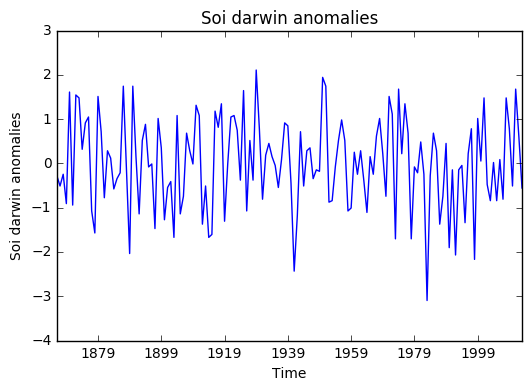

In [6]:
import iris.quickplot as qplt

soi_djf_anoms.rename('SOI_Darwin_anomalies')
qplt.plot(soi_djf_anoms)
qplt.show()